##  What is Gradient Descent?

Gradient Descent is an optimization algorithm used to **minimize a cost function** by updating parameters (like weights) in the direction of the **negative gradient**.

It's widely used in **Machine Learning** for algorithms such as:
- Linear Regression
- Logistic Regression
- Neural Networks

---

##  How Gradient Descent Works

At each iteration, Gradient Descent:

1. Calculates the gradient (partial derivative) of the loss function w.r.t. model parameters.
2. Updates the parameters by moving in the opposite direction of the gradient.
3. Repeats until convergence (or maximum iterations).

**Parameter update rule:**

\[
\theta := \theta - \alpha \cdot \nabla J(\theta)
\]

Where:
- \( \theta \) = model parameters (e.g., weights)
- \( \alpha \) = learning rate
- \( \nabla J(\theta) \) = gradient of the cost function

---

## Types of Gradient Descent

| Type                         | Description                                                                 | Update Frequency         |
|------------------------------|-----------------------------------------------------------------------------|---------------------------|
| **Batch Gradient Descent**   | Uses the **entire dataset** to compute the gradient.                        | Once per epoch            |
| **Stochastic Gradient Descent (SGD)** | Uses **one sample at a time** to compute and apply the gradient.           | Once per sample           |
| **Mini-Batch Gradient Descent** | Uses a **small random batch** (e.g., 32, 64 samples) each step.             | Once per mini-batch       |

---

## Key Hyperparameters

- **Learning Rate (α)**: Controls step size.  
  - Too high → diverges  
  - Too low → slow convergence

- **Epochs**: Number of times the full dataset passes through the model.

- **Batch Size**: Number of samples per gradient update (used in Mini-Batch GD).

---

## Goal

The main objective is to **minimize the cost function** (like Mean Squared Error in Linear Regression) and reach optimal parameter values that produce minimal prediction error.



#### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Load Dataset (Kaggle - House Prices)

In [9]:
df = pd.read_csv('/kaggle/input/houseprice-fs/house_fs.csv')
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageFinish_Unf,GarageQual_Fa,GarageQual_TA,GarageCond_Fa,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,target
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,False,False,True,False,False,True,False,True,True,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,False,False,True,False,False,True,False,True,True,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,False,False,True,False,False,True,False,True,True,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,True,False,True,False,False,True,False,True,False,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,False,False,True,False,False,True,False,True,True,250000


#### Normalize Features (important for gradient descent)

In [12]:
data = df[['LotArea', 'target']].dropna()

In [13]:
X = df[['LotArea']].values
y = df[['target']].values

In [17]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

#### Add bias term (intercept)

In [18]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

#### Batch Gradient Descent

In [19]:
def batch_gradient_descent(X, y, lr=0.01, epochs=100):
    m = X.shape[0]
    theta = np.random.randn(2, 1)
    cost_history = []

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients
        cost = (1/m) * np.sum((X.dot(theta) - y)**2)
        cost_history.append(cost)

    return theta, cost_history

#### Stochastic Gradient Descent

In [20]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=100):
    m = X.shape[0]
    theta = np.random.randn(2, 1)
    cost_history = []

    for epoch in range(epochs):
        cost = 0
        for i in range(m):
            rand_idx = np.random.randint(m)
            xi = X[rand_idx:rand_idx+1]
            yi = y[rand_idx:rand_idx+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
            cost += (xi.dot(theta) - yi)**2
        cost_history.append(cost[0][0] / m)

    return theta, cost_history

#### Mini-Batch Gradient Descent

In [21]:
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=32):
    m = X.shape[0]
    theta = np.random.randn(2, 1)
    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        cost = 0
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/xi.shape[0] * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
            cost += np.sum((xi.dot(theta) - yi)**2)

        cost_history.append(cost / m)

    return theta, cost_history

#### Running All three gradient descents

In [22]:
epochs = 100
lr = 0.01
batch_theta, batch_cost = batch_gradient_descent(X_b, y_scaled, lr=lr, epochs=epochs)
sgd_theta, sgd_cost = stochastic_gradient_descent(X_b, y_scaled, lr=lr, epochs=epochs)
mini_theta, mini_cost = mini_batch_gradient_descent(X_b, y_scaled, lr=lr, epochs=epochs, batch_size=32)

#### Plot cost over epochs

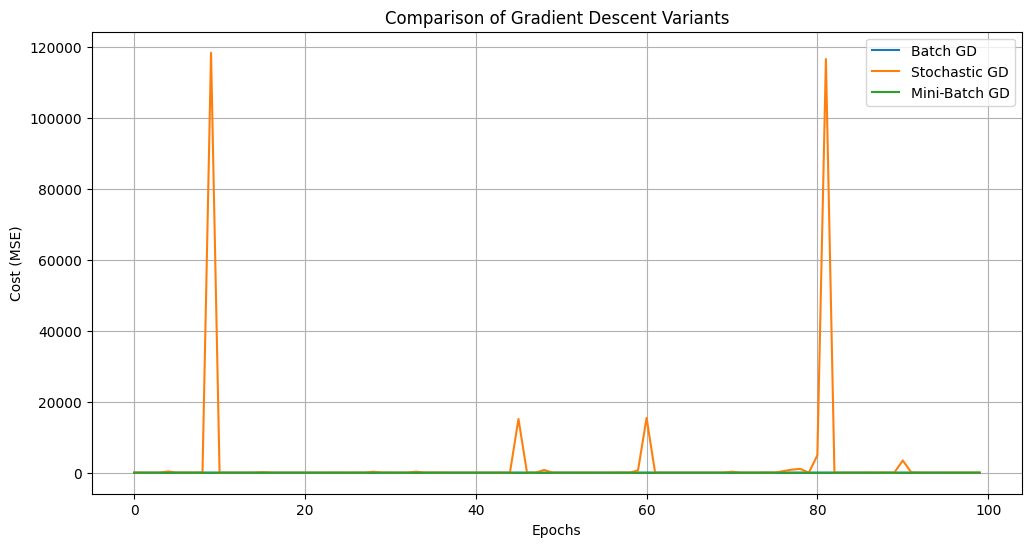

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(batch_cost, label='Batch GD')
plt.plot(sgd_cost, label='Stochastic GD')
plt.plot(mini_cost, label='Mini-Batch GD')
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Comparison of Gradient Descent Variants")
plt.legend()
plt.grid(True)
plt.show()

### Compare predictions for one for **Batch Gradient Descent**

In [24]:
y_pred_scaled = X_b.dot(batch_theta)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

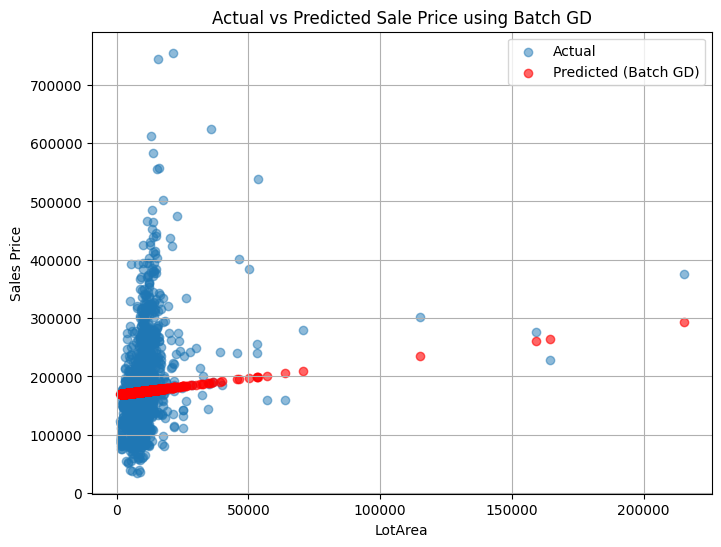

In [26]:
# Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(data['LotArea'], data['target'], label="Actual", alpha=0.5)
plt.scatter(data['LotArea'], y_pred, label="Predicted (Batch GD)", color='red', alpha=0.6)
plt.xlabel("LotArea")
plt.ylabel("Sales Price")
plt.legend()
plt.title("Actual vs Predicted Sale Price using Batch GD")
plt.grid(True)
plt.show()

### Compare predictions for one for **Stochastic Gradient Descent**

In [33]:
y_pred_sgd_scaled = X_b.dot(sgd_theta)
y_pred_sgd = scaler_y.inverse_transform(y_pred_sgd_scaled)

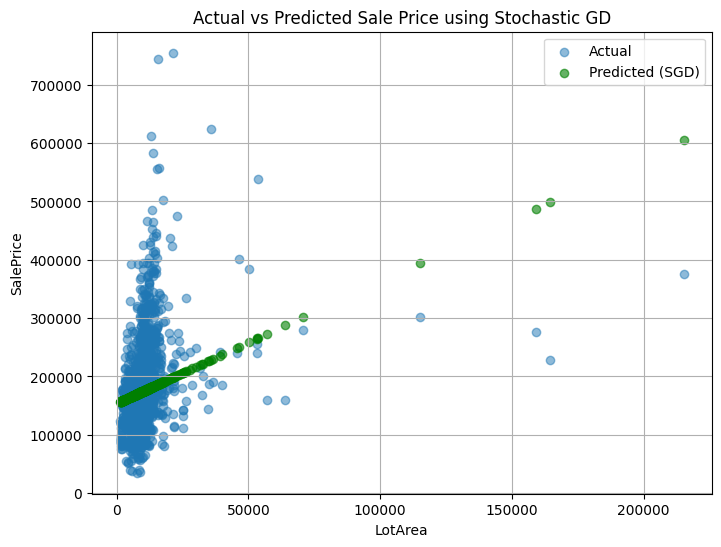

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(data['LotArea'], data['target'], label="Actual", alpha=0.5)
plt.scatter(data['LotArea'], y_pred_sgd, label="Predicted (SGD)", color='green', alpha=0.6)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.legend()
plt.title("Actual vs Predicted Sale Price using Stochastic GD")
plt.grid(True)
plt.show()

### Compare predictions for one for **Mini-Batch Gradient Descent**

In [36]:
y_pred_mini_scaled = X_b.dot(mini_theta)
y_pred_mini = scaler_y.inverse_transform(y_pred_mini_scaled)

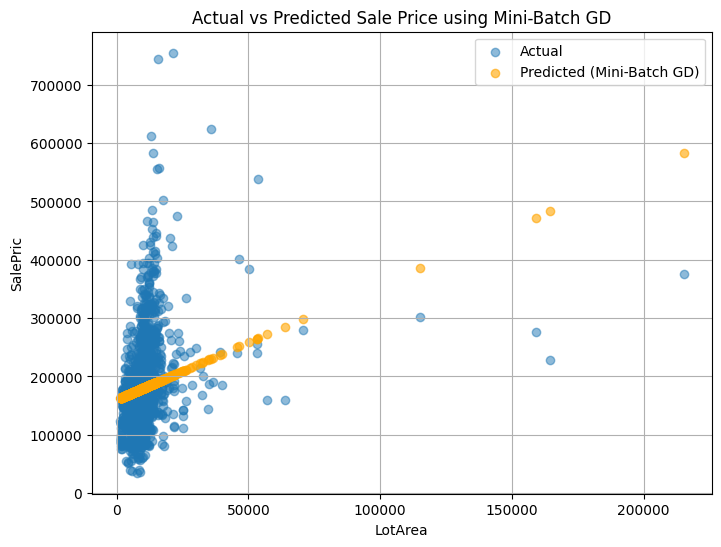

In [39]:
# Plot Mini-Batch GD predictions
plt.figure(figsize=(8, 6))
plt.scatter(data['LotArea'], data['target'], label="Actual", alpha=0.5)
plt.scatter(data['LotArea'], y_pred_mini, label="Predicted (Mini-Batch GD)", color='orange', alpha=0.6)
plt.xlabel("LotArea")
plt.ylabel("SalePric")
plt.legend()
plt.title("Actual vs Predicted Sale Price using Mini-Batch GD")
plt.grid(True)
plt.show()

### Using Built-in Function from scikit-learn

##### imports

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

##### Load and prepare data 

In [41]:
X = data[['LotArea']].values
y = data['target'].values

##### Normalise the features

In [42]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

##### Train using SGDRegressor (built-in SGD implementation)

In [43]:
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_scaled, y)

SGDRegressor(random_state=42)

##### Predict

In [44]:
y_pred = sgd_model.predict(X_scaled)

##### Evaluate

In [45]:
mse = mean_squared_error(y, y_pred)
print(f"SGDRegressor MSE: {mse:.2f}")

SGDRegressor MSE: 5874471793.20


##### Plot actual vs predicted

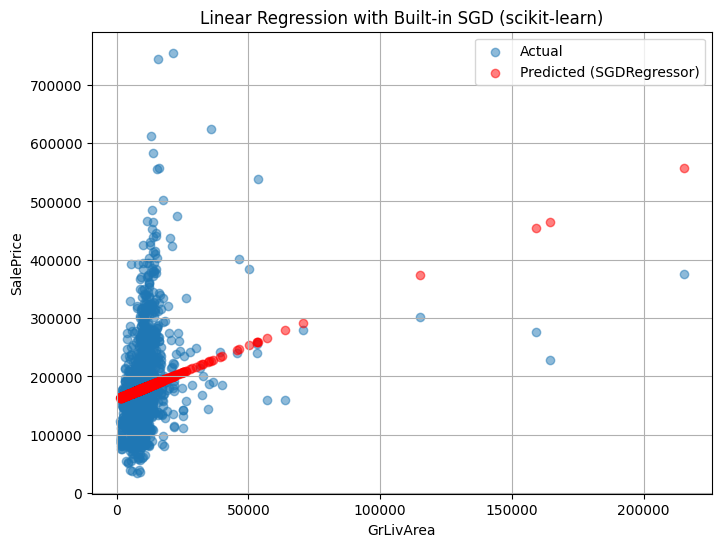

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual', alpha=0.5)
plt.scatter(X, y_pred, color='red', label='Predicted (SGDRegressor)', alpha=0.5)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Linear Regression with Built-in SGD (scikit-learn)")
plt.legend()
plt.grid(True)
plt.show()